### Distance Metric 

A **distance metric** is a way to **measure how far two points are from each other**.
In machine learning, it helps us decide **which data points are closer or more similar**.

### Euclidean Distance (straight-line distance)

Euclidean distance is the **direct, straight-line distance** between two points.

**Example:**
Imagine a **bird flying directly** from your house to a hospital.
The shortest straight path it flies is **Euclidean distance**.

**Example with numbers:**
Two points: A(2, 3) and B(5, 7)

Distance = √[(5 − 2)² + (7 − 3)²]
= √[9 + 16]
= √25
= **5**

So, the straight-line distance is **5 units**.

**Where it is used:**
When movement is free in any direction (maps, images, geometry).



### Manhattan Distance (grid-based distance)


Manhattan distance is the distance you get by **moving only left, right, up, or down**.

**Example:**
Imagine you are walking in a **city with blocks** (like Kathmandu or New York).
You can’t go straight through buildings, so you walk along roads.
That walking distance is **Manhattan distance**.

**Example with numbers:**
Two points: A(2, 3) and B(5, 7)

Distance = |5 − 2| + |7 − 3|
= 3 + 4
= **7**

So, the Manhattan distance is **7 units**.

**Where it is used:**
City roads, grid maps, text data, when straight movement is not possible.



### Simple Comparison

Euclidean distance measures **straight-line distance**,
while Manhattan distance measures **step-by-step distance along a grid**.




### Effect of K value on predictions (in K-Nearest Neighbors)

The **K value** in K-Nearest Neighbors (KNN) decides **how many nearest data points (neighbors)** are used to make a prediction.
Changing the value of K directly affects the **accuracy and behavior of predictions**.

### Small K value (e.g., K = 1 or 3)

When K is small, the model looks at **very few neighbors**.

**Effect on prediction:**
The prediction depends heavily on nearby points, so the model becomes **very sensitive to noise**.

**Result:**

* Low bias
* High variance
* May give **unstable or overfitted predictions**


### Large K value (e.g., K = 15 or 25)

When K is large, the model looks at **many neighbors**.

**Effect on prediction:**
The prediction becomes **more stable** because it averages over many points, but it may ignore local patterns.

**Result:**

* High bias
* Low variance
* May give **oversimplified or underfitted predictions**



### Moderate K value

A balanced K value gives a **good trade-off** between bias and variance.

**Effect on prediction:**
Predictions are **more accurate and reliable**.



### Conclusion

A **small K** can cause overfitting, while a **large K** can cause underfitting.
Choosing an appropriate K value is important for making **accurate predictions** in KNN.



In [9]:
# 1 Create a small 2-feature dataset manually (at least 8–10 records) with binary labels.
import csv

# Lists to store features and labels
X = []
y = []

# Open the CSV file
with open("C:/Users/shres/OneDrive/Documents/Social_Network_Ads.csv", "r") as f:
    reader = csv.reader(f)
    header = next(reader)  # skip header

    # Take first 9 valid rows (Age, Salary, Purchased)
    count = 0
    for row in reader:
        if count >= 9:
            break

        # row format:  Age, EstimateSalary, Purchased
        age = int(row[0])
        salary = int(row[1])
        purchased = int(row[2])

        X.append([age, salary])
        y.append(purchased)

        count += 1

# Print the manually loaded dataset
print("Features (Age, Salary):")
for i in range(len(X)):
    print(X[i], "-> Label:", y[i])


Features (Age, Salary):
[19, 19000] -> Label: 0
[35, 20000] -> Label: 0
[26, 43000] -> Label: 0
[27, 57000] -> Label: 0
[19, 76000] -> Label: 0
[27, 58000] -> Label: 0
[27, 84000] -> Label: 0
[32, 150000] -> Label: 1
[25, 33000] -> Label: 0


In [10]:
# 2 Write a function euclidean_distance(p1, p2) to compute distance between two points.

def euclidean_distance(p1, p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5
d = euclidean_distance(X[0], X[1])
print("Distance between", X[0], "and", X[1], "is", round(d,2))

Distance between [19, 19000] and [35, 20000] is 1000.13


In [11]:
# 3 Modify the function to support N-dimensional vectors.
def euclidean_distance(p1, p2):
    return sum((p1[i]-p2[i])**2 for i in range(len(p1)))**0.5
# 3-dimensional points
p1 = [2, 3, 4]
p2 = [5, 7, 1]

print("Distance:", round(euclidean_distance(p1, p2), 2))


Distance: 5.83


In [12]:
# 4 Write a function get_neighbors(X_train, x_test, k) that:
#• calculates distances
#• returns the k nearest neighbors

# Euclidean distance function
def euclidean_distance(p1, p2):
    return sum((p1[i]-p2[i])**2 for i in range(len(p1)))**0.5

# Function to get k nearest neighbors
def get_neighbors(X_train, x_test, k):
    distances = []
    
    # Step 1: Calculate distance for each training point
    for i in X_train:
        dist = euclidean_distance(i, x_test)
        distances.append((i, dist))
    
    # Step 2: Sort the list by distance
    distances.sort(key=lambda x: x[1])
    
    # Step 3: Get the first k points
    neighbors = [distances[i][0] for i in range(k)]
    return neighbors

x_test = [30, 60000]
k = 3

neighbors = get_neighbors(X, x_test, k)
print("3 nearest neighbors:", neighbors)

3 nearest neighbors: [[27, 58000], [27, 57000], [19, 76000]]


In [13]:
# 5 Write predict_knn(X_train, y_train, x_test, k) that predicts the most common label among neighbors.
# Euclidean distance function
def euclidean_distance(p1, p2):
    return sum((p1[i]-p2[i])**2 for i in range(len(p1)))**0.5

# Function to get k nearest neighbors
def get_neighbors(X_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_test)
        distances.append((i, dist))  # store index instead of point
    distances.sort(key=lambda x: x[1])
    neighbors_indices = [distances[i][0] for i in range(k)]
    return neighbors_indices

# Function to predict KNN label
def predict_knn(X_train, y_train, x_test, k):
    neighbors_indices = get_neighbors(X_train, x_test, k)
    
    # Count labels
    count = {}
    for idx in neighbors_indices:
        label = y_train[idx]
        if label in count:
            count[label] += 1
        else:
            count[label] = 1
    
    # Return the label with maximum count
    predicted_label = max(count, key=count.get)
    return predicted_label

pred = predict_knn(X, y, x_test, k)
print("Predicted label:", pred)


Predicted label: 0


In [14]:
# 6 Split your dataset into train and test manually (e.g., 70/30 split).

# Step 1: Determine split index
total_samples = len(X)
train_size = int(0.7 * total_samples)  # 70% for training

# Step 2: Split the dataset
X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

# Step 3: Print the split
print("X_train:", X_train)
print("y_train:", y_train)
print("X_test:", X_test)
print("y_test:", y_test)


X_train: [[19, 19000], [35, 20000], [26, 43000], [27, 57000], [19, 76000], [27, 58000]]
y_train: [0, 0, 0, 0, 0, 0]
X_test: [[27, 84000], [32, 150000], [25, 33000]]
y_test: [0, 1, 0]


In [15]:
# 7 Write a loop to predict labels for every test sample.

# Step 1: Empty list for predictions
y_pred = []

# Step 2: Loop through each test sample
for x in X_test:
    label = predict_knn(X_train, y_train, x, k)
    y_pred.append(label)

# Step 3: Print predicted labels
print("Predicted labels for test set:", y_pred)


Predicted labels for test set: [0, 0, 0]


In [16]:
# 8 Implement accuracy_score(y_true, y_pred) without using libraries.

def accuracy_score(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    accuracy = (correct / len(y_true)) * 100
    return accuracy

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 2), "%")

Accuracy: 66.67 %


In [17]:
# 9 Modify your code to support multi-class classification (at least 3 classes).
# Euclidean distance function
def euclidean_distance(p1, p2):
    return sum((p1[i]-p2[i])**2 for i in range(len(p1)))**0.5

# Function to get k nearest neighbors
def get_neighbors(X_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_test)
        distances.append((i, dist))  # store index
    distances.sort(key=lambda x: x[1])
    neighbors_indices = [distances[i][0] for i in range(k)]
    return neighbors_indices

# Function to predict label (supports multi-class)
def predict_knn(X_train, y_train, x_test, k):
    neighbors_indices = get_neighbors(X_train, x_test, k)
    
    # Count labels
    count = {}
    for idx in neighbors_indices:
        label = y_train[idx]
        if label in count:
            count[label] += 1
        else:
            count[label] = 1
    
    # Return label with maximum count
    predicted_label = max(count, key=count.get)
    return predicted_label


# Predict labels for all test points
y_pred = [predict_knn(X_train, y_train, x, k) for x in X_test]

print("Predicted labels:", y_pred)


Predicted labels: [0, 0, 0]


In [18]:
# 10 Replace Euclidean distance with Manhattan distance and compare predictions.

def manhattan_distance(p1, p2):
    return sum(abs(p1[i] - p2[i]) for i in range(len(p1)))

def get_neighbors_manhattan(X_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        dist = manhattan_distance(X_train[i], x_test)
        distances.append((i, dist))
    distances.sort(key=lambda x: x[1])
    return [distances[i][0] for i in range(k)]
    
def predict_knn_manhattan(X_train, y_train, x_test, k):
    neighbors = get_neighbors_manhattan(X_train, x_test, k)
    count = {}
    for idx in neighbors:
        label = y_train[idx]
        count[label] = count.get(label, 0) + 1
    return max(count, key=count.get)
    


for x in X_test:
    pred = predict_knn_manhattan(X_train, y_train, x, k)
    print("Test point:", x, "→ Manhattan Prediction:", pred)

Test point: [27, 84000] → Manhattan Prediction: 0
Test point: [32, 150000] → Manhattan Prediction: 0
Test point: [25, 33000] → Manhattan Prediction: 0


In [19]:
# 11 Add feature scaling (min-max normalization) and observe the effect on accuracy.
X = [
    [1, 1000],   
    [2, 1050],   
    [8, 1100],  
    [9, 1150],   
    [4, 5000],  
    [5, 5200],   
    [6, 5400],   
    [7, 5600]    
]

y = [0, 0, 1, 1, 2, 2, 2, 2]
X_train = X[:5]
y_train = y[:5]

X_test = X[5:]
y_test = y[5:]
k = 3


pred_before = []
for x in X_test:
    pred_before.append(predict_knn_manhattan(X_train, y_train, x, k=3))

acc_before = accuracy_score(y_test, pred_before)
print("Predictions before scaling:", pred_before)
print("Accuracy before scaling:", acc_before)

def min_max_scale(X):
    mins = [min(col) for col in zip(*X)]
    maxs = [max(col) for col in zip(*X)]

    X_scaled = []
    for row in X:
        scaled_row = []
        for i in range(len(row)):
            scaled = (row[i] - mins[i]) / (maxs[i] - mins[i])
            scaled_row.append(scaled)
        X_scaled.append(scaled_row)

    return X_scaled

X_scaled = min_max_scale(X)

X_train_s = X_scaled[:5]
X_test_s = X_scaled[5:]

pred_after = []

for x in X_test_s:
    pred_after.append(predict_knn_manhattan(X_train_s, y_train, x, k))

acc_after = accuracy_score(y_test, pred_after)

print("Predictions after scaling:", pred_after)
print("Accuracy after scaling:", acc_after)

Predictions before scaling: [1, 1, 1]
Accuracy before scaling: 0.0
Predictions after scaling: [2, 1, 1]
Accuracy after scaling: 33.33333333333333


In [20]:
# 12 Write code to automatically choose the best K based on validation accuracy.
X = [
    [22, 20000],
    [25, 22000],
    [35, 60000],
    [40, 65000],
    [28, 120000],
    [32, 130000],
    [45, 80000],
    [50, 90000]
]

y = [0, 0, 1, 1, 2, 2, 1, 1]

X_train = X[:5]
y_train = y[:5]

X_test = X[5:]
y_test = y[5:]


def manhattan_distance(p1, p2):
    return sum(abs(p1[i] - p2[i]) for i in range(len(p1)))
    
def predict_knn(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        dist = manhattan_distance(X_train[i], x_test)
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])

    votes = {}
    for i in range(k):
        label = distances[i][1]
        votes[label] = votes.get(label, 0) + 1

    return max(votes, key=votes.get)
    
def accuracy_score(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / len(y_true)

best_k = None
best_accuracy = 0

for k in range(1, 6):   # try K = 1 to 5
    predictions = []

    for x in X_test:
        predictions.append(predict_knn(X_train, y_train, x, k))

    acc = accuracy_score(y_test, predictions)
    print("K =", k, "Validation Accuracy =", acc)

    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k
        
print("Best K:", best_k)
print("Best Validation Accuracy:", best_accuracy)


K = 1 Validation Accuracy = 1.0
K = 2 Validation Accuracy = 1.0
K = 3 Validation Accuracy = 0.6666666666666666
K = 4 Validation Accuracy = 0.6666666666666666
K = 5 Validation Accuracy = 0.6666666666666666
Best K: 1
Best Validation Accuracy: 1.0


In [21]:
# 13 Add tie-breaking logic when two classes appear equally in neighbors.
def manhattan_distance(p1, p2):
    return sum(abs(p1[i] - p2[i]) for i in range(len(p1)))

def predict_knn_tie_break(X_train, y_train, x_test, k):
    distances = []

    # Step 1: calculate distances
    for i in range(len(X_train)):
        dist = manhattan_distance(X_train[i], x_test)
        distances.append((dist, y_train[i]))

    # Step 2: sort by distance
    distances.sort(key=lambda x: x[0])

    # Step 3: count votes
    votes = {}
    for i in range(k):
        label = distances[i][1]
        votes[label] = votes.get(label, 0) + 1

    # Step 4: find max vote
    max_vote = max(votes.values())

    # Step 5: check tie
    tied_classes = []
    for label in votes:
        if votes[label] == max_vote:
            tied_classes.append(label)

    # Step 6: tie-breaking
    if len(tied_classes) == 1:
        return tied_classes[0]
    else:
        # choose class of closest neighbor
        return distances[0][1]
X_train = [
    [20, 20000],  
    [22, 22000],  
    [40, 60000],  
    [42, 62000]   
]

y_train = [0, 1, 2, 0]

x_test = [21, 21000]
k = 2

pred = predict_knn_tie_break(X_train, y_train, x_test, k)
print("Prediction:", pred)


Prediction: 0


In [22]:
# 14 Add distance-weighted voting (closer neighbors get more weight).
def manhattan_distance(p1, p2):
    # Compute distance between two points
    distance = 0
    for i in range(len(p1)):
        distance += abs(p1[i] - p2[i])
    return distance

def predict_knn_weighted_simple(X_train, y_train, x_test, k):
    # Step 1: calculate distances
    distances = []
    for i in range(len(X_train)):
        d = manhattan_distance(X_train[i], x_test)
        distances.append((d, y_train[i]))
    
    # Step 2: sort distances (closest first)
    distances.sort()  # sorts by distance automatically

    # Step 3: weighted voting
    votes = {}
    for i in range(k):
        dist, label = distances[i]
        # closer points get more weight (1 / distance)
        weight = 1 / (dist + 0.0001)  # avoid division by zero
        if label in votes:
            votes[label] += weight
        else:
            votes[label] = weight

    # Step 4: return class with highest total weight
    best_class = max(votes, key=votes.get)
    return best_class
X_train = [
    [20, 20000],  # class 0
    [22, 22000],  # class 1
    [40, 60000],  # class 2
    [42, 62000]   # class 0
]

y_train = [0, 1, 2, 0]

X_test = [
    [21, 21000],
    [30, 50000]
]

k = 3

for x in X_test:
    pred = predict_knn_weighted_simple(X_train, y_train, x, k)
    print("Test point:", x, "→ Weighted KNN Prediction:", pred)


Test point: [21, 21000] → Weighted KNN Prediction: 0
Test point: [30, 50000] → Weighted KNN Prediction: 2


In [23]:
# 15 Extend your implementation to work with higher-dimensional data (5+ features).

def manhattan_distance(p1, p2):
    distance = 0
    for i in range(len(p1)):  # works for any number of features
        distance += abs(p1[i] - p2[i])
    return distance

def predict_knn_weighted_nd(X_train, y_train, x_test, k):
    distances = []
    
    # Step 1: compute distance to all training points
    for i in range(len(X_train)):
        d = manhattan_distance(X_train[i], x_test)
        distances.append((d, y_train[i]))
    
    # Step 2: sort distances (closest first)
    distances.sort()
    
    # Step 3: weighted voting
    votes = {}
    for i in range(k):
        dist, label = distances[i]
        weight = 1 / (dist + 1e-5)  # avoid divide by zero
        if label in votes:
            votes[label] += weight
        else:
            votes[label] = weight
    
    # Step 4: return class with highest total weight
    return max(votes, key=votes.get)
    
X_train = [
    [22, 20000, 2, 80, 1],   # class 0
    [25, 22000, 3, 85, 2],   # class 1
    [35, 60000, 5, 90, 3],   # class 2
    [40, 65000, 6, 88, 2]    # class 0
]

y_train = [0, 1, 2, 0]

X_test = [
    [23, 21000, 2, 82, 1],
    [38, 62000, 5, 89, 3]
]

k = 3

for x in X_test:
    pred = predict_knn_weighted_nd(X_train, y_train, x, k)
    print("Test point:", x, "→ Weighted KNN Prediction:", pred)


Test point: [23, 21000, 2, 82, 1] → Weighted KNN Prediction: 0
Test point: [38, 62000, 5, 89, 3] → Weighted KNN Prediction: 2


In [24]:
# 16 Benchmark runtime when dataset grows from 50 → 500 → 5,000 samples and print the results.
import random
import time

# Simple Manhattan distance
def manhattan_distance(p1, p2):
    distance = 0
    for i in range(len(p1)):
        distance += abs(p1[i] - p2[i])
    return distance

# Simple weighted KNN
def weighted_knn(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        d = manhattan_distance(X_train[i], x_test)
        distances.append((d, y_train[i]))
    distances.sort()
    
    votes = {}
    for i in range(k):
        dist, label = distances[i]
        weight = 1 / (dist + 0.0001)
        votes[label] = votes.get(label, 0) + weight
    
    return max(votes, key=votes.get)

# Benchmark for different dataset sizes
for size in [50, 500, 5000]:
    # Generate random 5-feature dataset
    X_train = [[random.randint(0,100) for _ in range(5)] for _ in range(size)]
    y_train = [random.randint(0,2) for _ in range(size)]
    
    # Random test point
    x_test = [random.randint(0,100) for _ in range(5)]
    
    # Measure time
    start = time.time()
    pred = weighted_knn(X_train, y_train, x_test, k=3)
    end = time.time()
    
    # Print results
    print(f"Dataset size: {size}, Time taken: {end-start:.6f} seconds, Prediction: {pred}")


Dataset size: 50, Time taken: 0.000239 seconds, Prediction: 1
Dataset size: 500, Time taken: 0.001438 seconds, Prediction: 1
Dataset size: 5000, Time taken: 0.017361 seconds, Prediction: 2


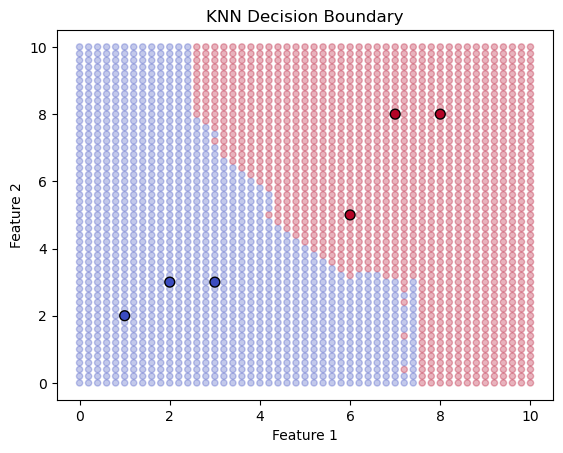

In [25]:
# 17 Plot decision boundary for KNN (using 2D features only).

import matplotlib.pyplot as plt

# Sample 2D dataset
X_train = [
    [1, 2], [2, 3], [3, 3], [6, 5], [7, 8], [8, 8]
]
y_train = [0, 0, 0, 1, 1, 1]

k = 3

# Manhattan distance
def manhattan_distance(p1, p2):
    return abs(p1[0]-p2[0]) + abs(p1[1]-p2[1])

# Weighted KNN
def weighted_knn(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        d = manhattan_distance(X_train[i], x_test)
        distances.append((d, y_train[i]))
    distances.sort()
    
    votes = {}
    for i in range(k):
        dist, label = distances[i]
        weight = 1 / (dist + 0.0001)
        votes[label] = votes.get(label, 0) + weight
    
    return max(votes, key=votes.get)

# Create grid points manually
x_min, x_max = 0, 10
y_min, y_max = 0, 10
step = 0.2

grid_points = []
grid_colors = []

y = y_min
while y <= y_max:
    x = x_min
    while x <= x_max:
        point = [x, y]
        label = weighted_knn(X_train, y_train, point, k)
        grid_points.append(point)
        grid_colors.append(label)
        x += step
    y += step

# Separate X and Y for plotting
grid_x = [p[0] for p in grid_points]
grid_y = [p[1] for p in grid_points]

# Plot decision boundary
plt.scatter(grid_x, grid_y, c=grid_colors, alpha=0.3, s=20, cmap=plt.cm.coolwarm)
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train],
            c=y_train, s=50, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Decision Boundary")
plt.show()


In [26]:
# 19 Compare test accuracy for K = 1, 3, 5, 7, 9
def manhattan_distance(p1, p2):
    dist = 0
    for i in range(len(p1)):
        dist += abs(p1[i] - p2[i])
    return dist

def predict_knn(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        d = manhattan_distance(X_train[i], x_test)
        distances.append((d, y_train[i]))

    distances.sort()
    
    
    k = min(k, len(distances))
    
    votes = {}
    for i in range(k):
        label = distances[i][1]
        votes[label] = votes.get(label, 0) + 1

    return max(votes, key=votes.get)

def accuracy_score(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / len(y_true)

X = [
    [22, 20000, 2, 80, 1],
    [25, 22000, 3, 85, 2],
    [35, 60000, 5, 90, 3],
    [40, 65000, 6, 88, 2],
    [28, 120000, 4, 75, 1],
    [32, 130000, 5, 78, 2],
    [45, 80000, 7, 82, 3],
    [50, 90000, 8, 85, 2],
    [29, 40000, 3, 79, 1],
    [38, 70000, 6, 84, 2]
]

y = [0, 0, 1, 1, 2, 2, 1, 1, 0, 1]

X_train = X[:7]
y_train = y[:7]

X_test = X[7:]
y_test = y[7:]

for k in [1, 3, 5, 7, 9]:
    predictions = []
    for x in X_test:
        predictions.append(predict_knn(X_train, y_train, x, k))

    acc = accuracy_score(y_test, predictions)
    print("K =", k, "→ Test Accuracy =", acc)


K = 1 → Test Accuracy = 1.0
K = 3 → Test Accuracy = 1.0
K = 5 → Test Accuracy = 0.6666666666666666
K = 7 → Test Accuracy = 0.6666666666666666
K = 9 → Test Accuracy = 0.6666666666666666


In [27]:
# Add functionality to ignore missing values during distance calculation.

# Distance Function (Ignore Missing Values) 
def manhattan_distance_ignore_missing(p1, p2):
    dist = 0
    used = 0

    for i in range(len(p1)):
        if p1[i] is not None and p2[i] is not None:
            dist += abs(p1[i] - p2[i])
            used += 1

    # If no valid features, return very large distance
    if used == 0:
        return 10**9

    return dist


#  Get Neighbors 
def get_neighbors_ignore_missing(X_train, x_test, k):
    distances = []

    for i in range(len(X_train)):
        d = manhattan_distance_ignore_missing(X_train[i], x_test)
        distances.append((i, d))

    # Sort by distance
    distances.sort(key=lambda x: x[1])

    # Safe K
    k = min(k, len(distances))

    neighbors_indices = []
    for i in range(k):
        neighbors_indices.append(distances[i][0])

    return neighbors_indices


# KNN Prediction (Your Count Logic) 
def predict_knn_ignore_missing(X_train, y_train, x_test, k):
    neighbors_indices = get_neighbors_ignore_missing(X_train, x_test, k)

    count = {}
    for idx in neighbors_indices:
        label = y_train[idx]
        if label in count:
            count[label] += 1
        else:
            count[label] = 1

    return max(count, key=count.get)



X_train = [
    [25, 30000],
    [30, None],
    [None, 50000],
    [45, 80000],
    [35, 60000]
]

y_train = [0, 1, 1, 2, 2]

X_test = [
    [28, 40000],
    [40, None]
]

k = 3

#  Prediction 
for x in X_test:
    pred = predict_knn_ignore_missing(X_train, y_train, x, k)
    print("Test point:", x, "→ Predicted class:", pred)


Test point: [28, 40000] → Predicted class: 1
Test point: [40, None] → Predicted class: 2


In [28]:
# 20 Detect and remove duplicate rows before training.

def remove_duplicates(X, y):
    X_unique = []
    y_unique = []

    for i in range(len(X)):
        if X[i] not in X_unique:
            X_unique.append(X[i])
            y_unique.append(y[i])

    return X_unique, y_unique

X_train = [
    [25, 30000],
    [30, None],
    [25, 30000],   # duplicate
    [45, 80000],
    [30, None]     # duplicate
]

y_train = [0, 1, 0, 2, 1]

X_train, y_train = remove_duplicates(X_train, y_train)

print("X_train:", X_train)
print("y_train:", y_train)

for x in X_test:
    pred = predict_knn_ignore_missing(X_train, y_train, x, k)
    print("Test point:", x, "→ Predicted class:", pred)

X_train: [[25, 30000], [30, None], [45, 80000]]
y_train: [0, 1, 2]
Test point: [28, 40000] → Predicted class: 1
Test point: [40, None] → Predicted class: 2


In [29]:
# 21 Implement cross-validation to evaluate performance.
def accuracy_score(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / len(y_true)

def cross_validation_knn(X, y, k_neighbors, folds=3):
    fold_size = len(X) // folds
    accuracies = []

    for i in range(folds):
        # Split data
        X_test = X[i*fold_size : (i+1)*fold_size]
        y_test = y[i*fold_size : (i+1)*fold_size]

        X_train = X[:i*fold_size] + X[(i+1)*fold_size:]
        y_train = y[:i*fold_size] + y[(i+1)*fold_size:]

        # Predict
        predictions = []
        for x in X_test:
            pred = predict_knn_ignore_missing(X_train, y_train, x, k_neighbors)
            predictions.append(pred)

        # Accuracy
        acc = accuracy_score(y_test, predictions)
        accuracies.append(acc)

    # Average accuracy
    return sum(accuracies) / len(accuracies)

X = [
    [25, 30000],
    [30, None],
    [35, 50000],
    [40, 60000],
    [45, 80000],
    [28, 40000],
    [50, 90000],
    [32, None],
    [38, 55000]
]

y = [0, 1, 1, 2, 2, 0, 2, 1, 1]

avg_accuracy = cross_validation_knn(X, y, k_neighbors=3, folds=3)
print("Average Cross-Validation Accuracy:", avg_accuracy)


Average Cross-Validation Accuracy: 0.5555555555555555


In [30]:
# 22 Add a confusion matrix (manually coded, not using libraries).
def confusion_matrix(y_true, y_pred):
    # Get unique classes
    classes = sorted(set(y_true + y_pred))
    n = len(classes)

    # Create empty matrix
    matrix = []
    for i in range(n):
        matrix.append([0] * n)

    # Fill matrix
    for i in range(len(y_true)):
        actual = y_true[i]
        predicted = y_pred[i]
        matrix[actual][predicted] += 1

    return matrix
    
y_true = [0, 1, 2, 1, 0, 2]
y_pred = [0, 2, 2, 1, 0, 1]

cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
for row in cm:
    print(row)


Confusion Matrix:
[2, 0, 0]
[0, 1, 1]
[0, 1, 1]


In [31]:
# 23 Handle categorical features by encoding them.

def encode_categorical_easy(X):
    X_encoded = []
    mappings = []

    n_features = len(X[0])

    for i in range(n_features):
        # Find unique values for this column
        unique = []
        for row in X:
            if row[i] not in unique and row[i] is not None:
                unique.append(row[i])
        # Save mapping
        mapping = {val: idx for idx, val in enumerate(unique)}
        mappings.append(mapping)

    # Encode the dataset
    for row in X:
        new_row = []
        for i in range(n_features):
            if row[i] is None:
                new_row.append(None)
            else:
                new_row.append(mappings[i][row[i]])
        X_encoded.append(new_row)

    return X_encoded, mappings

X = [
    ["Red", "Male"],
    ["Blue", "Female"],
    ["Green", "Male"],
    ["Red", "Female"]
]

X_encoded, mappings = encode_categorical_easy(X)

print("Encoded X:")
for row in X_encoded:
    print(row)

print("Mappings:", mappings)


Encoded X:
[0, 0]
[1, 1]
[2, 0]
[0, 1]
Mappings: [{'Red': 0, 'Blue': 1, 'Green': 2}, {'Male': 0, 'Female': 1}]


In [32]:
# 24 Compare your KNN results with a simple baseline (e.g., always predicting majority class).

# Distance (Manhattan, ignore None)
def manhattan_distance_ignore_missing(p1, p2):
    dist = 0
    used = 0
    for i in range(len(p1)):
        if p1[i] is not None and p2[i] is not None:
            dist += abs(p1[i] - p2[i])
            used += 1
    if used == 0:
        return 10**9
    return dist


# KNN Prediction
def predict_knn_ignore_missing(X_train, y_train, x_test, k):
    distances = []

    for i in range(len(X_train)):
        d = manhattan_distance_ignore_missing(X_train[i], x_test)
        distances.append((d, y_train[i]))

    distances.sort()
    k = min(k, len(distances))

    count = {}
    for i in range(k):
        label = distances[i][1]
        if label in count:
            count[label] += 1
        else:
            count[label] = 1

    return max(count, key=count.get)


# Majority Class (Baseline) 
def majority_class(y_train):
    count = {}
    for label in y_train:
        if label in count:
            count[label] += 1
        else:
            count[label] = 1
    return max(count, key=count.get)


def baseline_predict(y_train, X_test):
    maj = majority_class(y_train)
    predictions = []
    for _ in X_test:
        predictions.append(maj)
    return predictions


# Accuracy
def accuracy_score(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / len(y_true)


# Dataset 
X_train = [
    [20, 20000],   
    [22, 22000],   
    [25, 25000],   

    [40, 60000],   
    [42, 62000],   

    [60, 100000],  
    [62, 102000],  
    [64, 104000]   
]

y_train = [
    0, 0, 0,
    1, 1,
    2, 2, 2
]
X_test = [
    [63, 103000],
    [61, 101000]
]

y_test = [2, 2]
k=3


# KNN Evaluation
knn_predictions = []
for x in X_test:
    knn_predictions.append(
        predict_knn_ignore_missing(X_train, y_train, x, k=3)
    )

knn_accuracy = accuracy_score(y_test, knn_predictions)


# Baseline Evaluation
baseline_predictions = baseline_predict(y_train, X_test)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)


# Results 
print("KNN Predictions:", knn_predictions)
print("KNN Accuracy:", knn_accuracy)

print("Baseline Predictions:", baseline_predictions)
print("Baseline Accuracy:", baseline_accuracy)


KNN Predictions: [2, 2]
KNN Accuracy: 1.0
Baseline Predictions: [0, 0]
Baseline Accuracy: 0.0


In [33]:
# 25 Save predictions to a CSV file and include predicted probability (from weighted votes).
import csv

# Distance
def manhattan_distance(p1, p2):
    dist = 0
    for i in range(len(p1)):
        dist += abs(p1[i] - p2[i])
    return dist


# Weighted KNN
def predict_knn_weighted(X_train, y_train, x_test, k):
    distances = []

    for i in range(len(X_train)):
        d = manhattan_distance(X_train[i], x_test)
        distances.append((d, y_train[i]))

    distances.sort()
    k = min(k, len(distances))

    weights = {}
    total_weight = 0

    for i in range(k):
        dist, label = distances[i]
        weight = 1 / (dist + 1e-5)   # avoid divide by zero
        total_weight += weight

        if label in weights:
            weights[label] += weight
        else:
            weights[label] = weight

    # predicted class
    predicted_class = max(weights, key=weights.get)

    # probability of predicted class
    probability = weights[predicted_class] / total_weight

    return predicted_class, probability


# Dataset 
X_train = [
    [20, 20000],
    [22, 22000],
    [25, 25000],
    [40, 60000],
    [42, 62000],
    [60, 100000],
    [62, 102000],
    [64, 104000]
]

y_train = [0, 0, 0, 1, 1, 2, 2, 2]

X_test = [
    [63, 103000],
    [21, 21000]
]

k = 3


# Save Predictions to CSV 
with open("knn_predictions.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Feature1", "Feature2", "Predicted_Class", "Probability"])

    for x in X_test:
        pred, prob = predict_knn_weighted(X_train, y_train, x, k)
        writer.writerow([x[0], x[1], pred, round(prob, 3)])

print("Predictions saved to knn_predictions.csv")


Predictions saved to knn_predictions.csv
